In [3]:
#library(pcaMethods)
#library(pcaReduce)
library(SC3)
library(scater)
library(scran)
library(SingleCellExperiment)
library(pheatmap)
library(mclust)
set.seed(1234567)

In [4]:
umi <- readRDS("post_common_normalisation_approaches.rds")
umi <- computeSumFactors(umi)
umi <- normalize(umi)

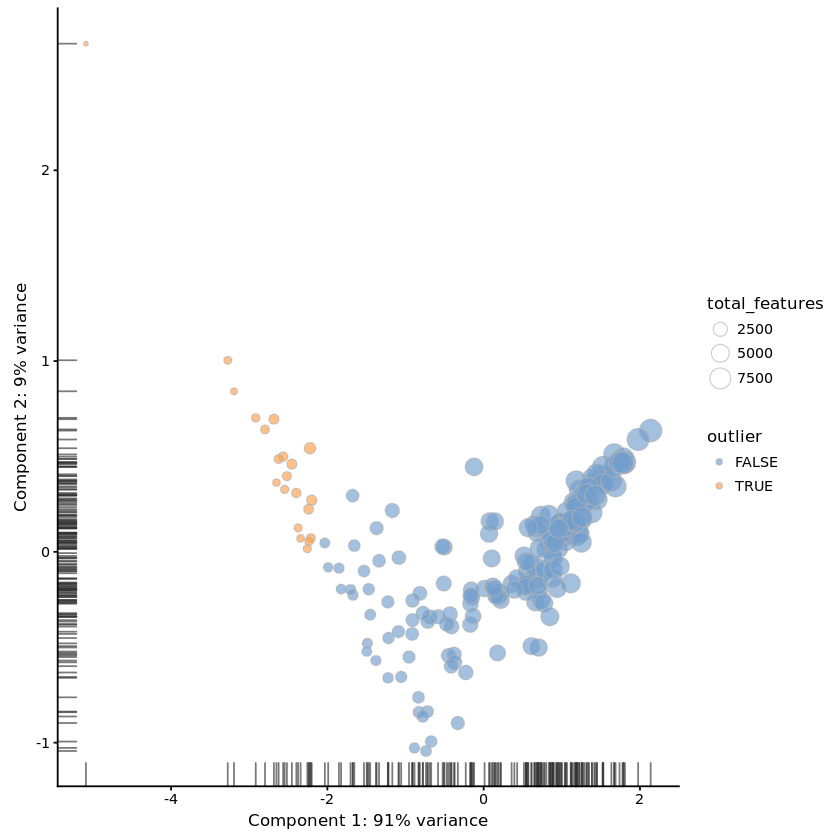

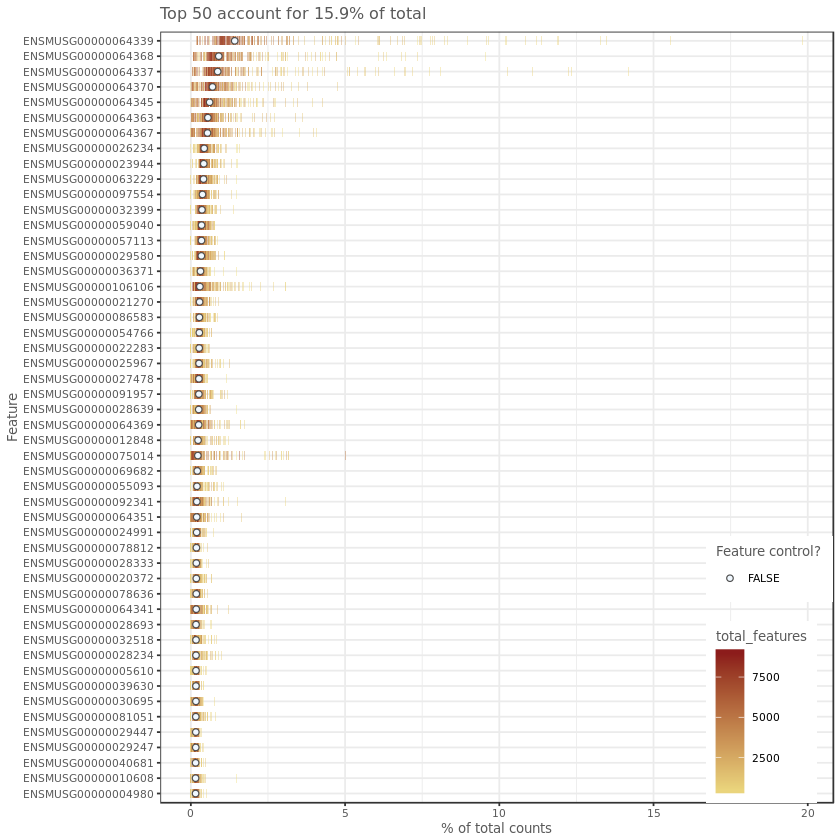

In [6]:
umi <- plotPCA(
    umi,
    size_by = "total_features", 
    #shape_by = "use",
    pca_data_input = "pdata",
    detect_outliers = TRUE,
    return_SCE = TRUE
)

plotQC(umi)


In [7]:
umi <- sc3_estimate_k(umi)
metadata(umi)$sc3$k_estimation

Estimating k...


[1] 4

In [21]:
rowData(umi)$feature_symbol <- rownames(umi)   # oddly needed to run SC3...
umi <- sc3(umi, ks = 3:12, biology = TRUE)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...


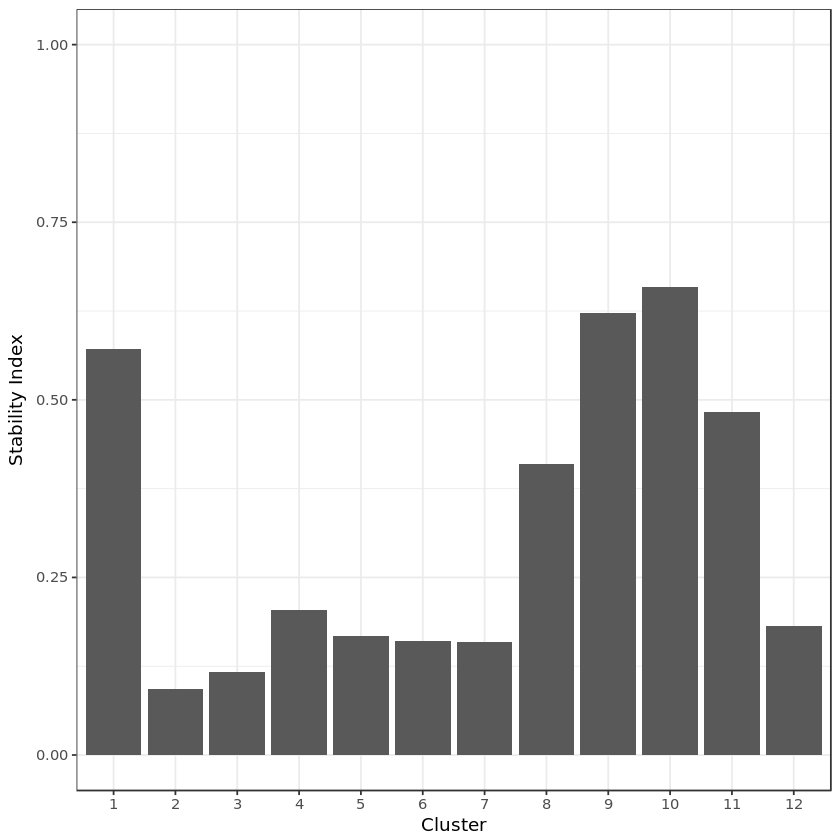

In [22]:
sc3_plot_cluster_stability(umi, 12)

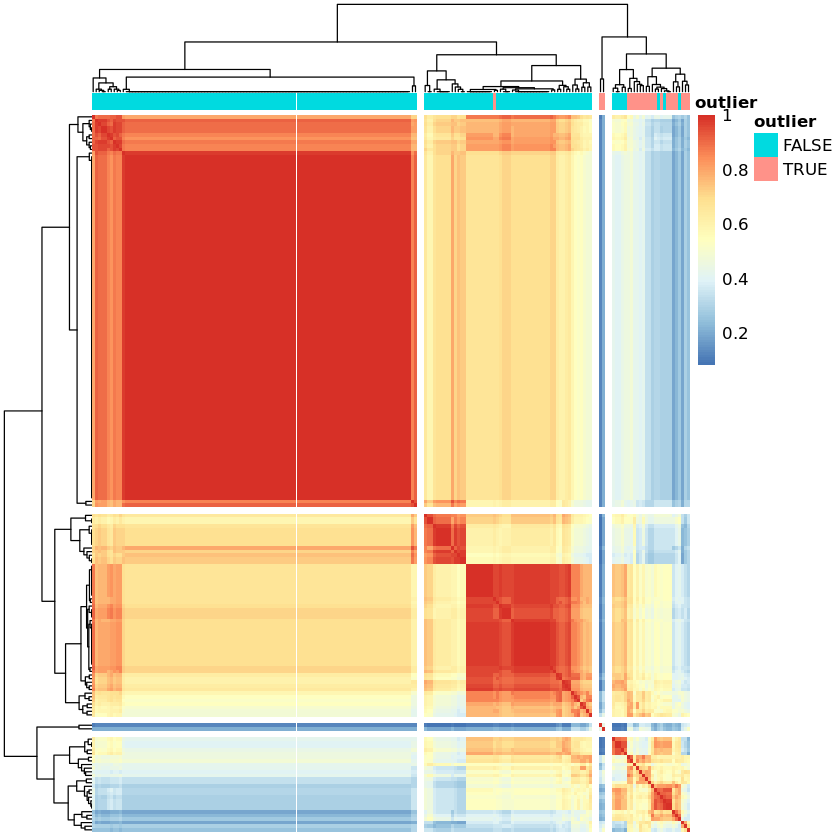

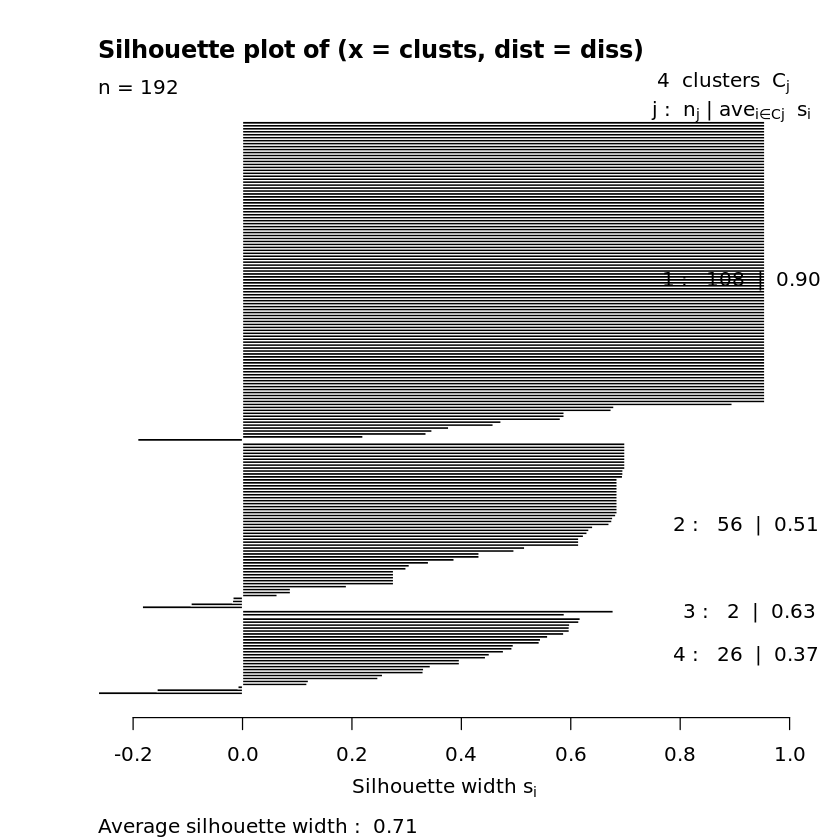

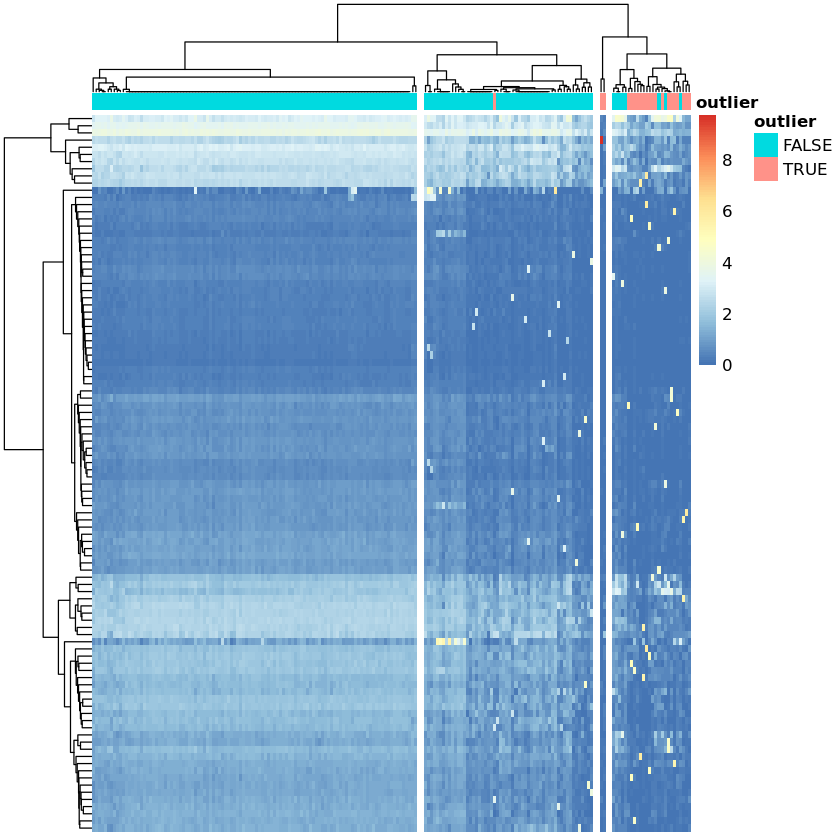

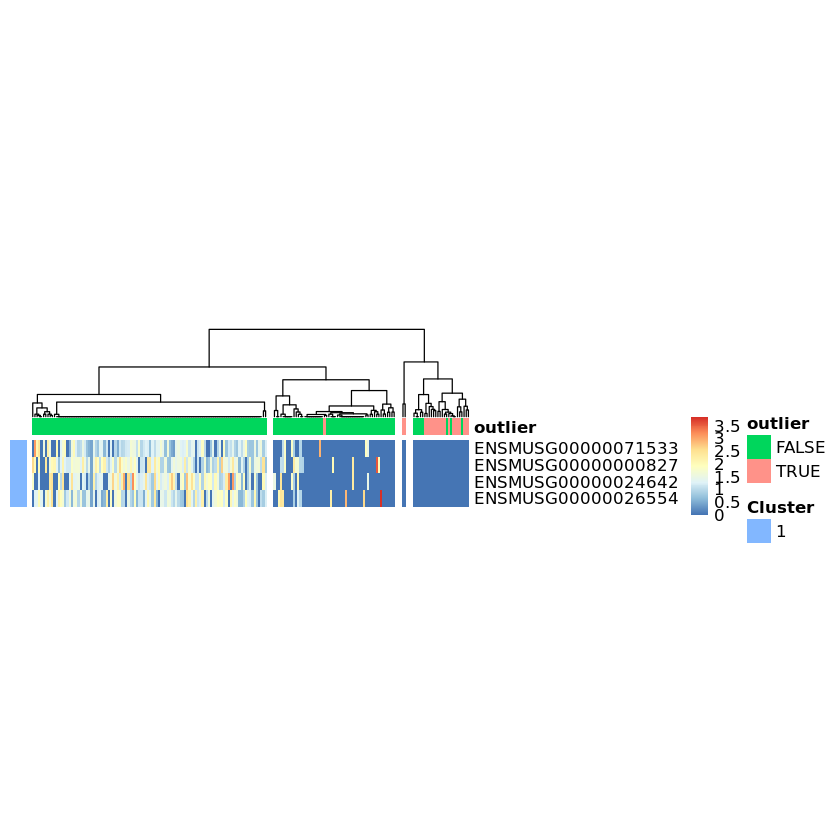

In [23]:
sc3_plot_consensus(umi, k = 4, show_pdata = "outlier")
sc3_plot_silhouette(umi, k = 4)
sc3_plot_expression(umi, k = 4, show_pdata = "outlier")
sc3_plot_markers(umi, k = 4, show_pdata = "outlier")

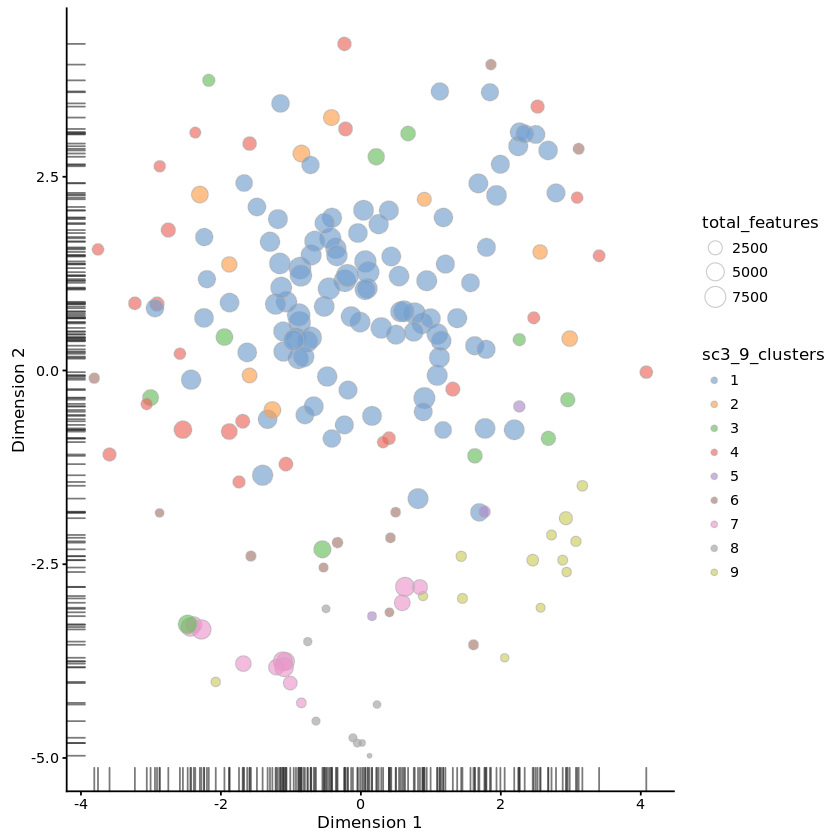

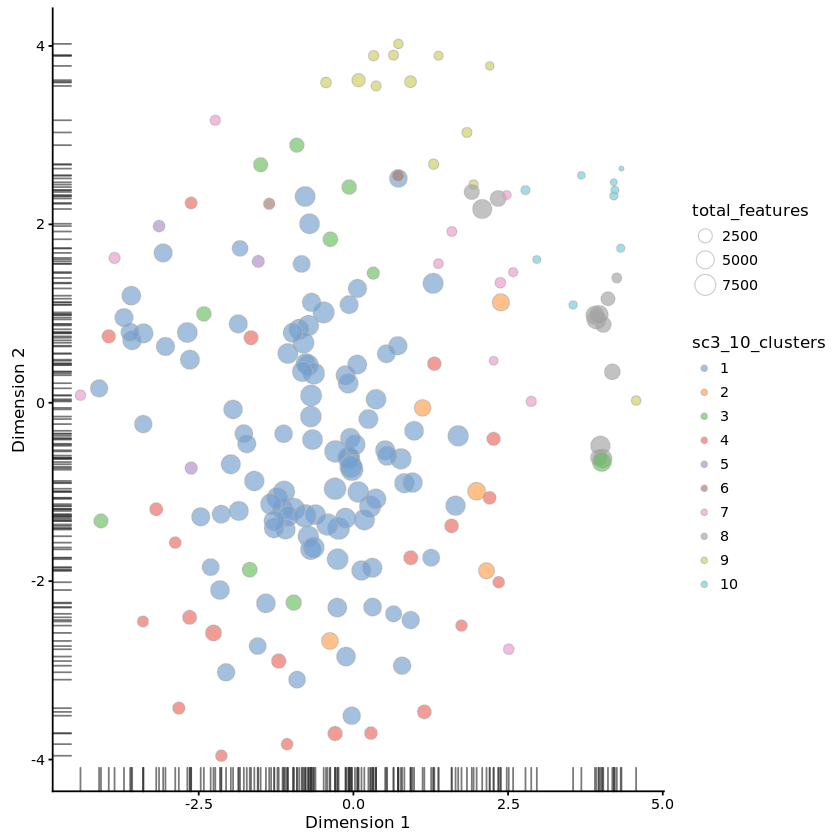

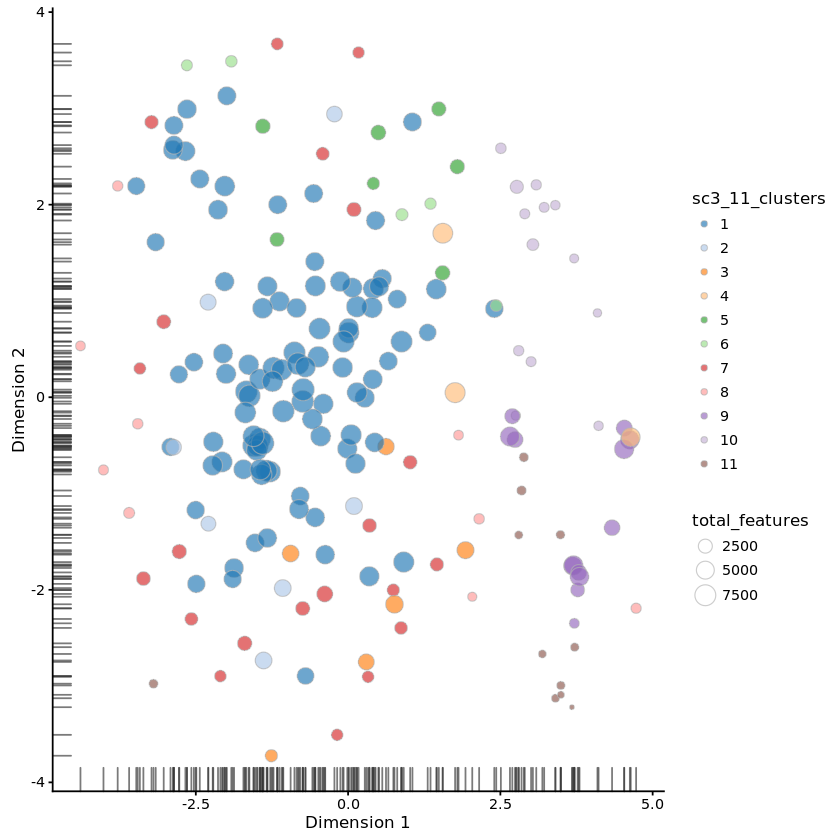

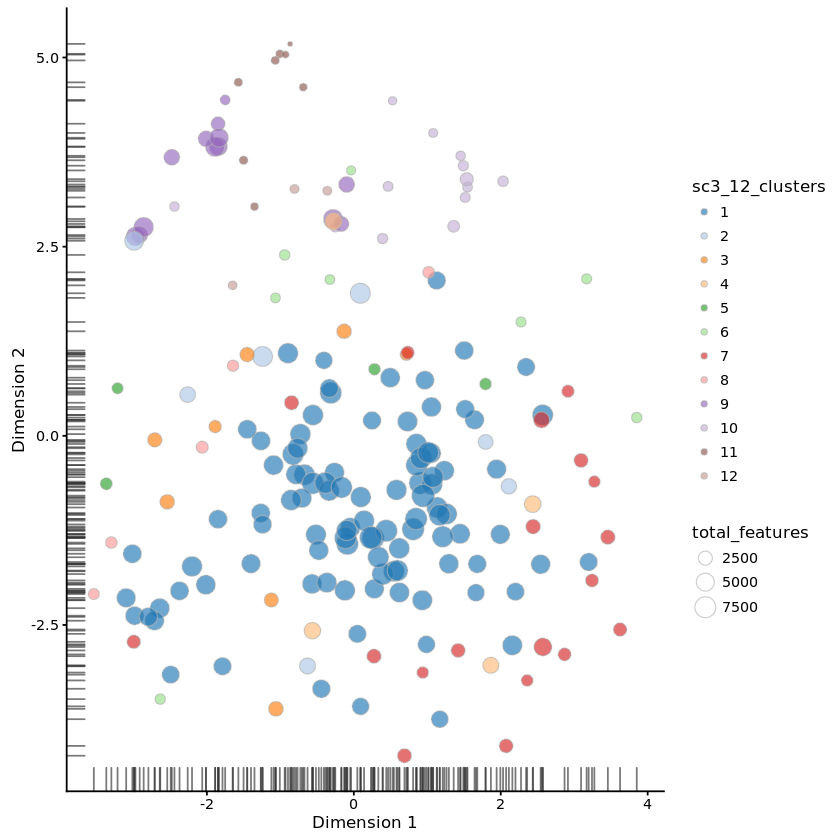

In [19]:
plotPCA(
    umi, 
    colour_by = "sc3_3_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_4_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_5_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_6_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_7_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_8_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_9_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_10_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_11_clusters",
    size_by = "total_features"
)

plotPCA(
    umi, 
    colour_by = "sc3_12_clusters",
    size_by = "total_features"
)

In [1]:
sc3_plot_consensus(umi, k = 1:10)


#sc3_interactive(umi)

ERROR: Error in sc3_plot_consensus(umi, k = 1:10): could not find function "sc3_plot_consensus"


In [17]:
# PCA reduce
library(pcaReduce)

input <- logcounts(umi[rowData(umi)$sc3_gene_filter, ])
pca.red <- PCAreduce(t(input), nbt = 1, q = 30, method = 'S')[[1]]

Loading required package: pcaMethods

Attaching package: ‘pcaMethods’

The following object is masked from ‘package:stats’:

    loadings

Loading required package: mnormt


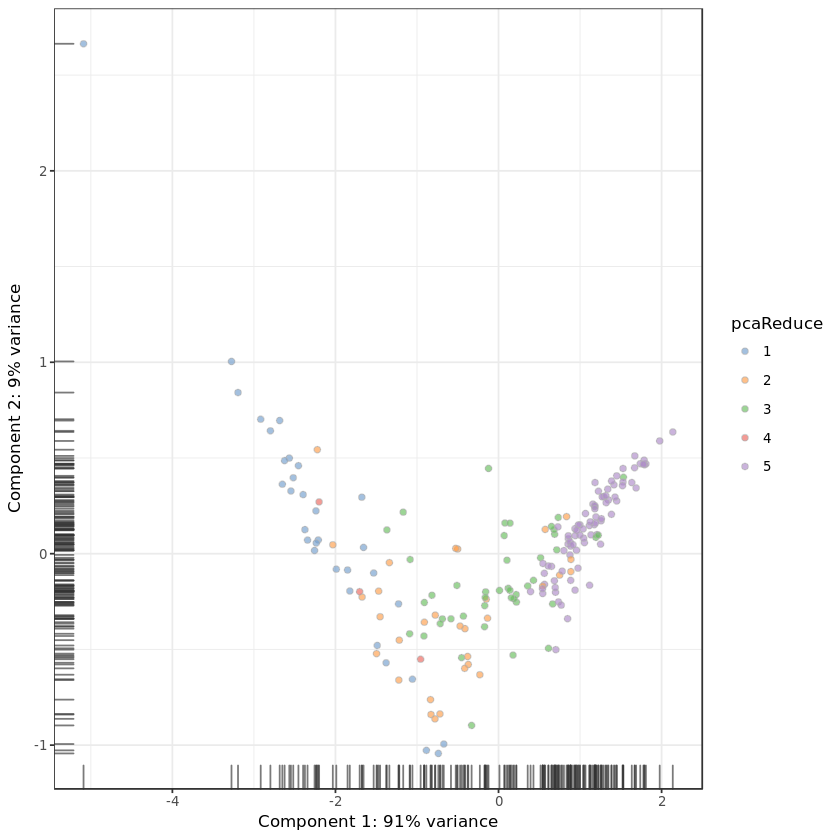

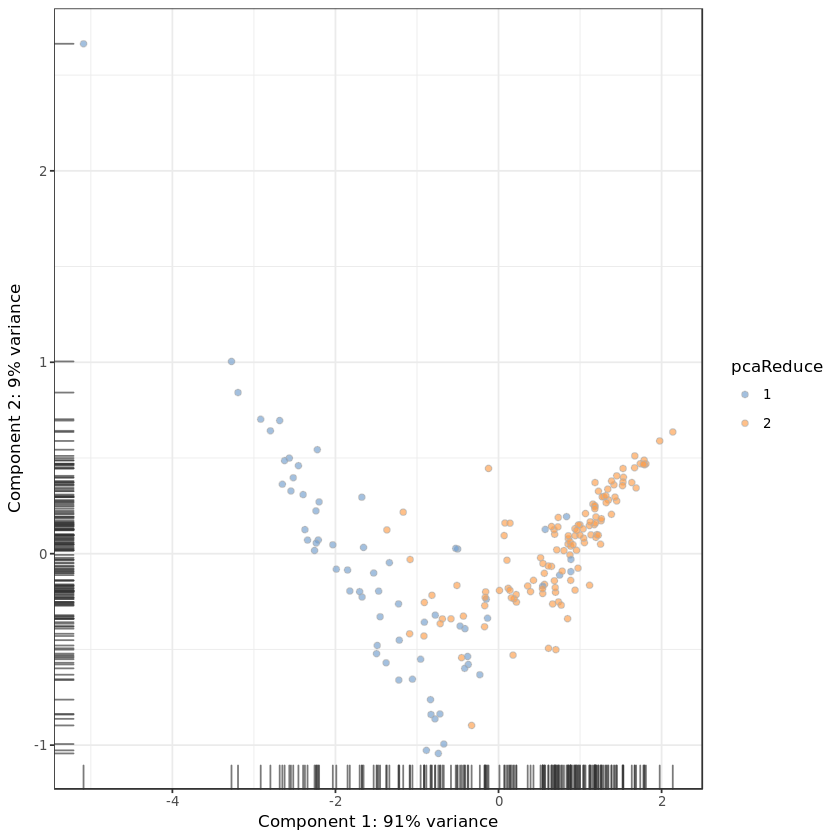

In [32]:
colData(umi)$pcaReduce <- as.character(pca.red[,32 - 5])
plotPCA(umi, colour_by = "pcaReduce")

colData(umi)$pcaReduce <- as.character(pca.red[,32 - 2])
plotPCA(umi, colour_by = "pcaReduce")

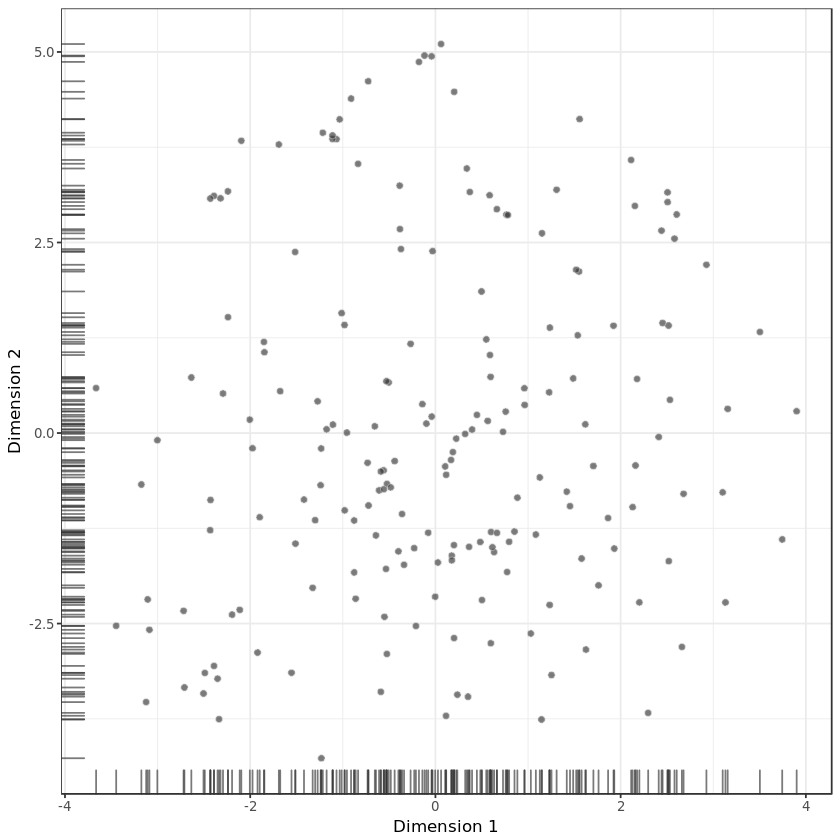

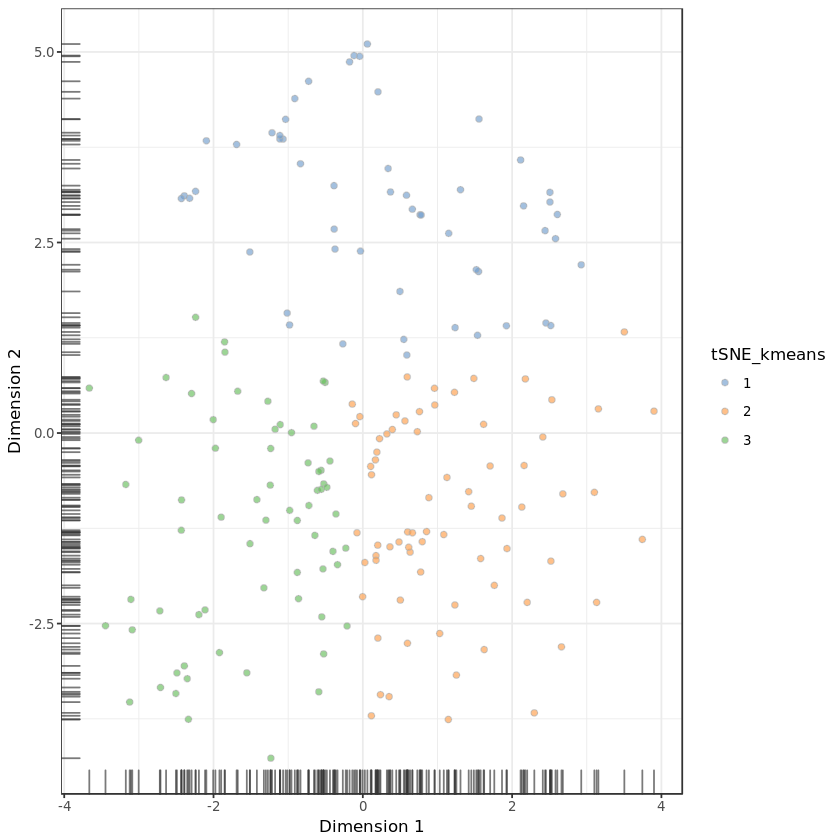

In [38]:
# tSNE + kMeans
umi <- plotTSNE(umi, rand_seed = 1231231, return_SCE = TRUE)
colData(umi)$tSNE_kmeans <- as.character(kmeans(umi@reducedDims$TSNE, centers = 3)$clust)
plotTSNE(umi, rand_seed = 1, colour_by = "tSNE_kmeans")